# Aprendizaje estadístico computacional

# Tarea 1

Caso 1 (30 puntos): Utilice el conjunto de datos “ozone” disponibles en la librería “faraway” (buscar en https://pypi.org/project/faraway/).

Considere Y=O3 como variable respuesta, todas las demás serán variables explicativas.

In [1]:
# carga librerías
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# carga data
import faraway.datasets.ozone
ozone = faraway.datasets.ozone.load()
ozone.to_csv('ozone.csv', index=False)
df = pd.read_csv('ozone.csv')
df.head()
#ozone.to_excel('ozone.xlsx', index = False)

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,33
1,5,5700,3,37,45,590,-24,128,100,34
2,5,5760,3,51,54,1450,25,139,60,35
3,6,5720,4,69,35,1568,15,121,60,36
4,4,5790,6,19,45,2631,-33,123,100,37


In [3]:
# Descripción del dataset OZONE
print(faraway.datasets.ozone.DESCR)


Ozone in LA in 1976

Description:

     A study the relationship between atmospheric ozone concentration
     and meteorology in the Los Angeles Basin in 1976.  A number of
     cases with missing variables have been removed for simplicity.

Variables:

     A data frame with 330 observations on the following 10 variables.

     ‘O3’ Ozone conc., ppm, at Sandbug AFB.

     ‘vh’ a numeric vector

     ‘wind’ wind speed

     ‘humidity’ a numeric vector

     ‘temp’ temperature

     ‘ibh’ inversion base height

     ‘dpg’ Daggett pressure gradient

     ‘ibt’ a numeric vector

     ‘vis’ visibility

     ‘doy’ day of the year

Source:

     Breiman, L. and J. H. Friedman (1985). Estimating optimal
     transformations for multiple regression and correlation. Journal
     of the American Statistical Association 80, 580-598.



Este conjunto de datos contiene información sobre la concentración de ozono atmosférico y la meteorología en la cuenca de Los Ángeles en 1976. El conjunto de datos tiene 330 observaciones y 10 variables, incluyendo: O3 (concentración de ozono, ppm, en Sandbug AFB), vh (un vector numérico), viento (velocidad del viento), humedad (un vector numérico), temperatura, ibh (altura de la base de inversión), dpg (gradiente de presión Daggett), ibt (un vector numérico), visibilidad y día del año.

Estadísiticos descriptivos básicos y gráficos de los datos con respecto a la variable a explicar 'O3'

In [4]:
df.describe().round(2)

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
count,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00,330.00
mean,11.78,5750.48,4.85,58.13,61.75,2572.88,17.37,161.16,124.53,209.42
std,8.01,105.71,2.12,19.87,14.46,1803.89,35.72,76.68,79.36,104.38
min,1.00,5320.00,0.00,19.00,25.00,111.00,-69.00,-25.00,0.00,33.00
25%,5.00,5690.00,3.00,47.00,51.00,877.50,-9.00,107.00,70.00,120.25
50%,10.00,5760.00,5.00,64.00,62.00,2112.50,24.00,167.50,120.00,205.50
75%,17.00,5830.00,6.00,73.00,72.00,5000.00,44.75,214.00,150.00,301.75
max,38.00,5950.00,11.00,93.00,93.00,5000.00,107.00,332.00,350.00,390.00


<Figure size 1000x500 with 0 Axes>

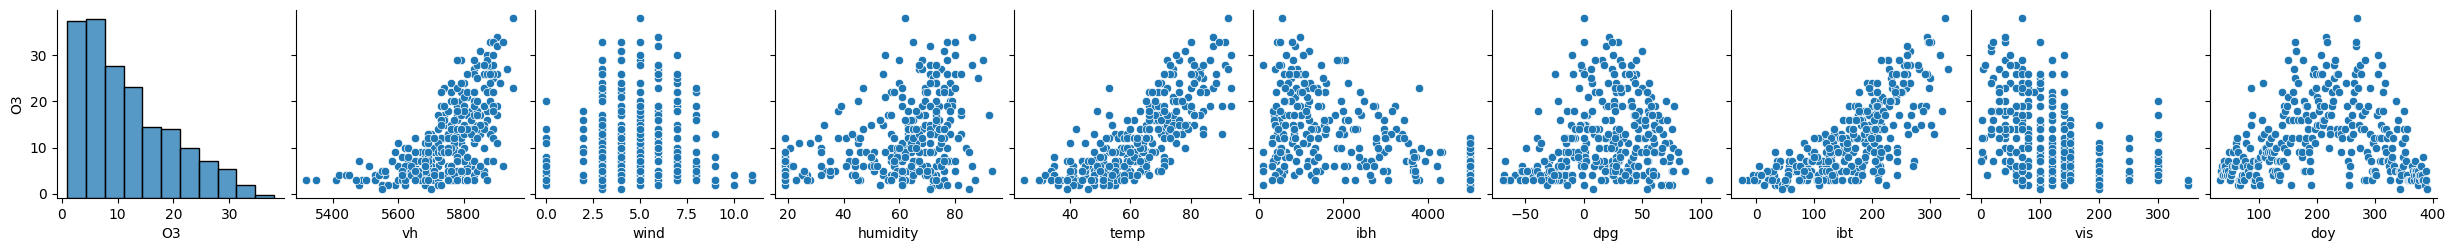

In [5]:
fig=plt.figure(figsize=(10,5));
sns.pairplot(data=df,y_vars='O3');

Generación de variables cuadráticas y cúbicas para analizar si existe alguna relación de este tipo y mejore el modelo explicativo

In [6]:
df['temp2'] = df['temp']**2
df['humidity2'] = df['humidity']**2
df['ibh2'] = df['ibh']**2
df['dpg2'] = df['dpg']**2
df['ibt2'] = df['ibt']**2
df['doy2'] = df['doy']**2

df['temp3'] = df['temp']**3
df['humidity3'] = df['humidity']**3
df['ibh3'] = df['ibh']**3
df['dpg3'] = df['dpg']**3
df['ibt3'] = df['ibt']**3
df['doy3'] = df['doy']**3

In [7]:
# variables
vbles = ['O3','vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy','temp2','humidity2', 'ibh2', 'dpg2', 'ibt2', 'doy2', 'temp3','humidity3', 'ibh3', 'dpg3', 'ibt3', 'doy3']

Graficar relación de las variables X con Y = 'O3'

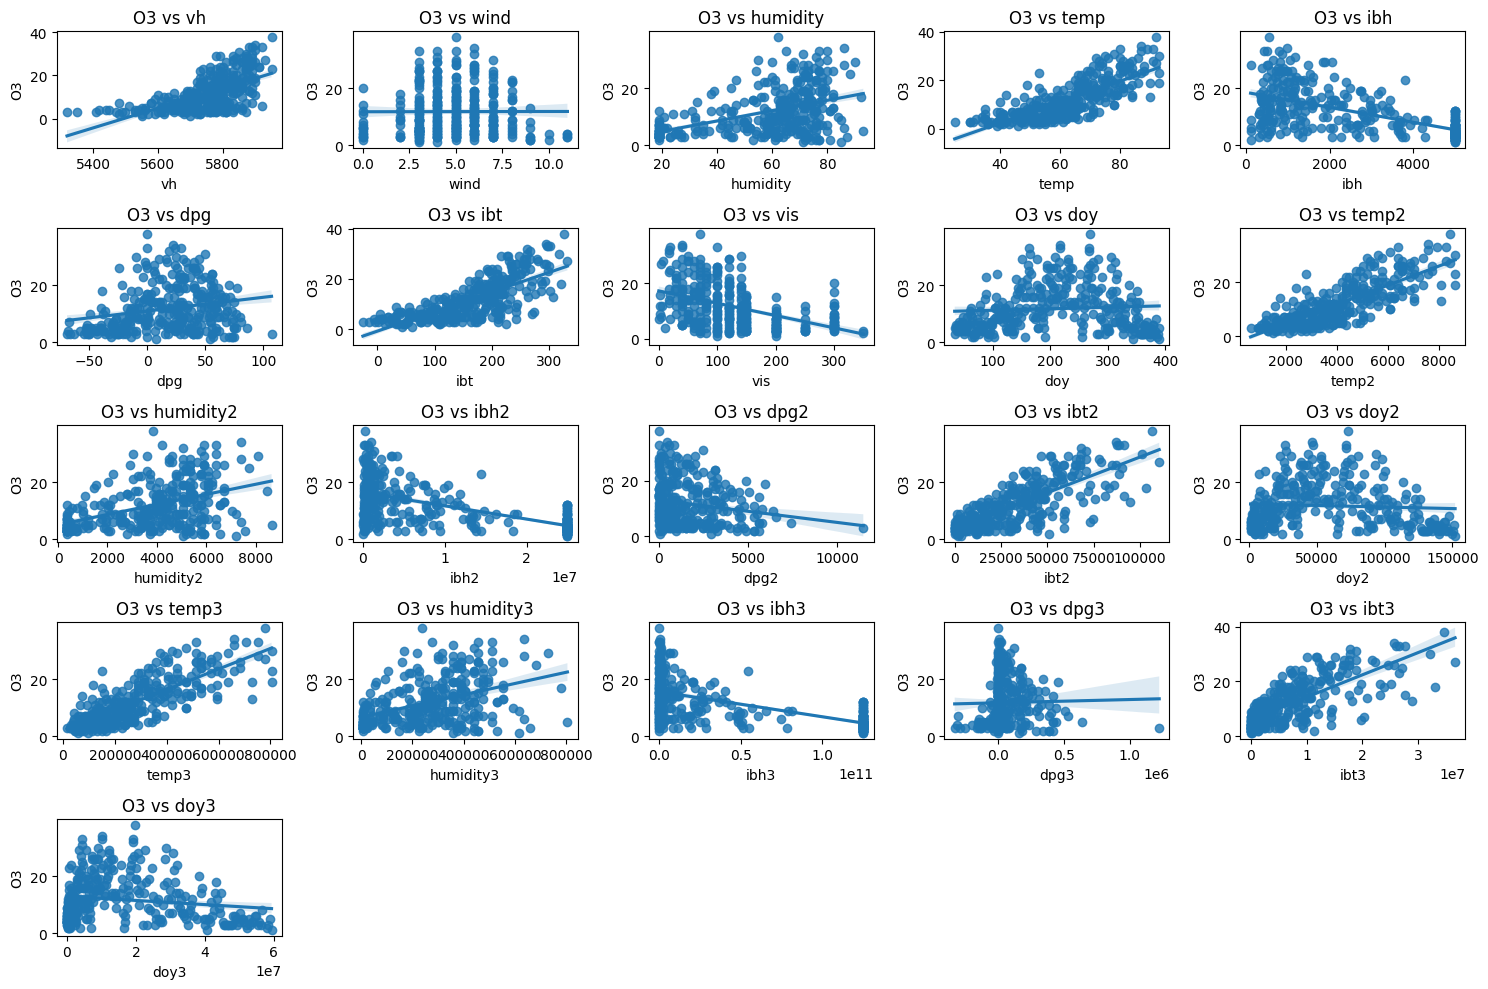

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables
variables_x = vbles[1:]
variable_y = vbles[0]

# gráficos para cada par de variables
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_x, start=1):
    plt.subplot(5, 5, i)
    sns.regplot(data=df, x=variable, y=variable_y)  # Agregar línea de ajuste lineal
    plt.title(f'{variable_y} vs {variable}')
    plt.xlabel(variable)
    plt.ylabel(variable_y)

plt.tight_layout()
plt.show()

# Pregunta 1
Realizar una descomposición aleatoria de la base de datos con la proporción 80%-20% para train y test, respectivamente.

In [9]:
# Estandarizar las variables
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[vbles] = scaler.fit_transform(df_scaled[vbles])

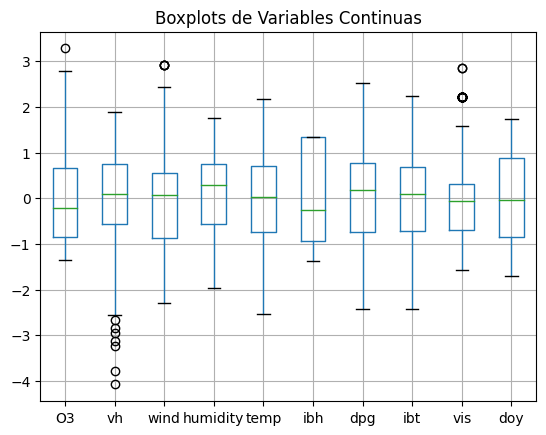

In [10]:
# Visualizar los boxplots de las variables continuas
#df_scaled[vbles].boxplot() 
df_scaled[['O3','vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']].boxplot()
plt.title('Boxplots de Variables Continuas')
plt.show()

In [11]:
y = df_scaled.iloc[:, 0].values
X = df_scaled.iloc[:, 1:].values

In [12]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pregunta 2
Utilizando la data train, realizar un análisis descriptivo de las variables de la base de datos. 

Debe incluir indicadores y gráficas.

In [13]:
# Pasar set de train (X e y) a un dataframe
df_xtrain = pd.DataFrame(X_train)
df_ytrain = pd.DataFrame(y_train)
df_train = pd.concat([df_ytrain, df_xtrain ], axis=1)
df_train.columns = vbles
df_train.head()
#df_train.to_excel('df_train.xlsx', index=False)

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,...,ibh2,dpg2,ibt2,doy2,temp3,humidity3,ibh3,dpg3,ibt3,doy3
0,-0.347007,-0.194081,-0.401412,-1.317392,0.363339,-1.183064,-0.739413,1.068914,0.952356,-0.934811,...,-0.933415,-0.894066,1.103511,-0.936302,0.149027,-1.292143,-0.811177,-0.401367,1.009818,-0.857199
1,0.903129,0.753356,-0.401412,0.800090,1.125280,0.096119,1.223405,0.611775,-0.057209,0.168644,...,-0.224298,1.286353,0.463447,-0.070838,1.122072,0.838304,-0.427482,1.161477,0.280232,-0.254661
2,-1.097089,-0.288825,-0.401412,-1.972803,-0.537137,1.347541,-2.337707,-0.459237,0.195183,-1.529717,...,1.461278,1.666728,-0.647106,-1.159277,-0.653304,-1.440342,1.513219,-2.369537,-0.674169,-0.932130
3,-0.722048,0.563868,0.071681,-1.972803,0.155537,-0.434098,-0.907654,0.272186,0.321378,-1.443360,...,-0.642599,-0.807808,0.052281,-1.137499,-0.067201,-1.440342,-0.705882,-0.419527,-0.124838,-0.927425
4,0.278061,0.753356,-0.874504,0.245512,1.194547,-0.137066,1.307525,0.742386,-0.688187,0.120668,...,-0.429956,1.510984,0.636185,-0.120677,1.225581,-0.049308,-0.578615,1.402811,0.465877,-0.298922


In [14]:
# Estadística descriptiva básica
df_train.describe().round(2)

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,...,ibh2,dpg2,ibt2,doy2,temp3,humidity3,ibh3,dpg3,ibt3,doy3
count,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,...,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00
mean,-0.00,0.01,-0.01,0.02,0.01,0.02,0.04,0.00,-0.01,-0.00,...,0.02,0.02,-0.01,-0.01,0.00,0.02,0.01,0.04,-0.02,-0.01
std,0.98,0.99,0.98,0.99,0.98,1.00,0.99,0.98,0.98,0.99,...,1.00,1.03,0.97,0.99,0.97,0.99,1.00,1.03,0.95,0.98
min,-1.35,-3.79,-2.29,-1.97,-2.20,-1.37,-2.42,-2.30,-1.57,-1.69,...,-0.95,-0.94,-1.29,-1.19,-1.38,-1.44,-0.81,-2.65,-0.95,-0.94
25%,-0.85,-0.48,-0.87,-0.41,-0.68,-0.93,-0.68,-0.70,-0.69,-0.84,...,-0.88,-0.75,-0.82,-0.89,-0.75,-0.76,-0.80,-0.40,-0.78,-0.83
50%,-0.22,0.18,0.07,0.32,0.02,-0.17,0.19,0.08,-0.06,-0.03,...,-0.45,-0.37,-0.16,-0.27,-0.20,0.06,-0.59,-0.30,-0.31,-0.42
75%,0.56,0.75,0.54,0.75,0.73,1.35,0.80,0.69,0.32,0.85,...,1.46,0.55,0.57,0.76,0.58,0.75,1.51,0.27,0.39,0.61
max,2.65,1.89,2.91,1.76,2.16,1.35,2.51,2.23,2.85,1.73,...,1.46,5.92,3.18,2.16,2.97,3.12,1.51,8.01,4.04,2.53


<Figure size 1500x800 with 0 Axes>

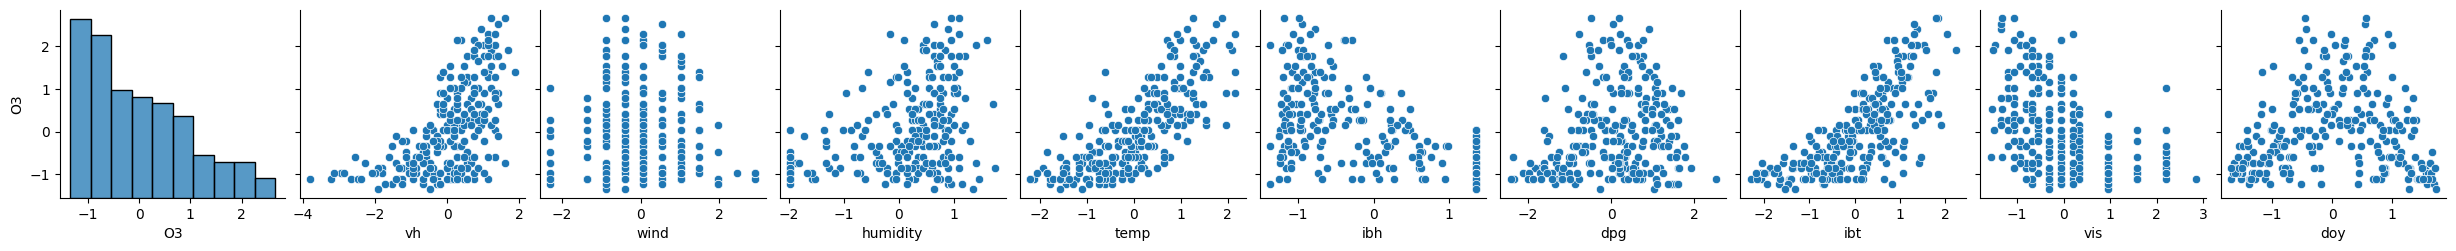

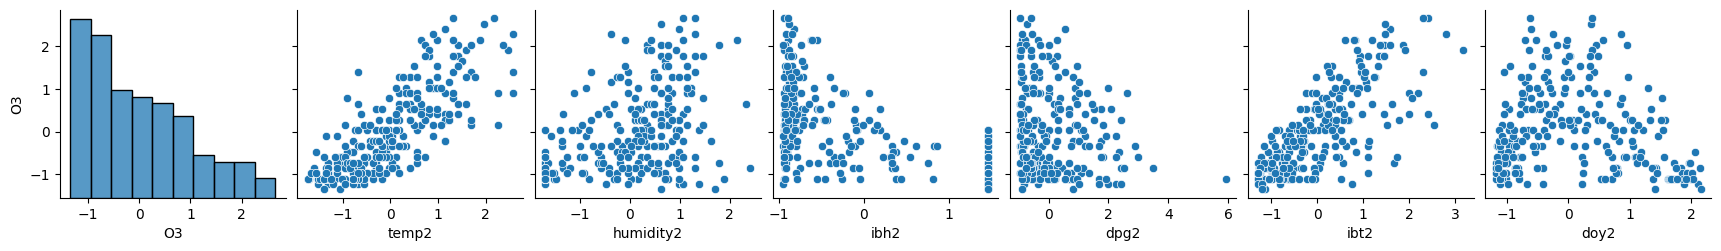

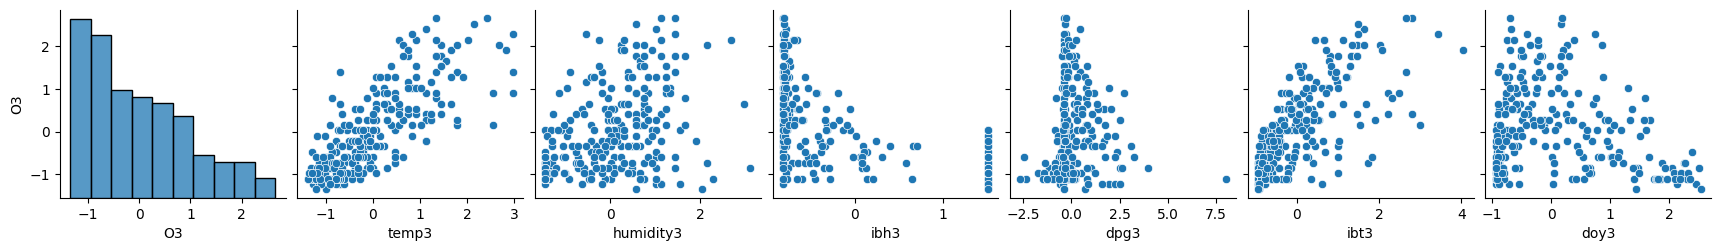

In [15]:
# Análisis de relaciones por medio de gráficos
fig=plt.figure(figsize=(15,8));
sns.pairplot(data=df_train[['O3','vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']],y_vars='O3');
sns.pairplot(data=df_train[['O3','temp2','humidity2', 'ibh2', 'dpg2', 'ibt2', 'doy2']],y_vars='O3');
sns.pairplot(data=df_train[['O3','temp3','humidity3', 'ibh3', 'dpg3', 'ibt3', 'doy3']],y_vars='O3');

Correlación lineal
- Alta correlación lineal entre O3 y temp, ibt e ibh; moderada con vh, humidity y vis
- Variables cuadráticas: Alta correlación de O3 con temp2, e ibt2
- Variables cúbicas: Alta correlación de O3 con temp3, e ibt3

In [16]:
# Correlación lineal
display(df_train[['O3','vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy']].corr().round(4))
display(df_train[['O3','temp2','humidity2', 'ibh2', 'dpg2', 'ibt2', 'doy2']].corr().round(4))
display(df_train[['O3','temp3','humidity3', 'ibh3', 'dpg3', 'ibt3', 'doy3']].corr().round(4))


,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
O3,1.0000,0.5807,0.0004,0.4363,0.7691,-0.6270,0.2040,0.7419,-0.4690,0.0593
vh,0.5807,1.0000,-0.2039,0.0494,0.7997,-0.5006,-0.1699,0.8505,-0.3776,0.3345
wind,0.0004,-0.2039,1.0000,0.2410,0.0040,0.1515,0.3303,-0.1250,0.1106,-0.2212
humidity,0.4363,0.0494,0.2410,1.0000,0.3256,-0.2372,0.6540,0.1759,-0.3847,0.0737
temp,0.7691,0.7997,0.0040,0.3256,1.0000,-0.5476,0.1621,0.8694,-0.4263,0.2318
ibh,-0.6270,-0.5006,0.1515,-0.2372,-0.5476,1.0000,0.0334,-0.7770,0.4133,0.0605
dpg,0.2040,-0.1699,0.3303,0.6540,0.1621,0.0334,1.0000,-0.1085,-0.1345,-0.1365
ibt,0.7419,0.8505,-0.1250,0.1759,0.8694,-0.7770,-0.1085,1.0000,-0.4411,0.2074
vis,-0.4690,-0.3776,0.1106,-0.3847,-0.4263,0.4133,-0.1345,-0.4411,1.0000,-0.2090
doy,0.0593,0.3345,-0.2212,0.0737,0.2318,0.0605,-0.1365,0.2074,-0.2090,1.0000


,O3,temp2,humidity2,ibh2,dpg2,ibt2,doy2
O3,1.0000,0.7844,0.4262,-0.6358,-0.1453,0.7568,-0.0668
temp2,0.7844,1.0000,0.3404,-0.5581,-0.0491,0.8626,0.0789
humidity2,0.4262,0.3404,1.0000,-0.2561,0.0767,0.2031,-0.0003
ibh2,-0.6358,-0.5581,-0.2561,1.0000,0.2139,-0.7161,0.1087
dpg2,-0.1453,-0.0491,0.0767,0.2139,1.0000,-0.1950,-0.2152
ibt2,0.7568,0.8626,0.2031,-0.7161,-0.1950,1.0000,0.0839
doy2,-0.0668,0.0789,-0.0003,0.1087,-0.2152,0.0839,1.0000


,O3,temp3,humidity3,ibh3,dpg3,ibt3,doy3
O3,1.0000,0.7834,0.4049,-0.6215,0.0163,0.7257,-0.1581
temp3,0.7834,1.0000,0.3250,-0.5339,0.0389,0.8500,-0.0477
humidity3,0.4049,0.3250,1.0000,-0.2429,0.3107,0.1947,-0.0467
ibh3,-0.6215,-0.5339,-0.2429,1.0000,0.0231,-0.6045,0.1472
dpg3,0.0163,0.0389,0.3107,0.0231,1.0000,-0.1284,-0.2818
ibt3,0.7257,0.8500,0.1947,-0.6045,-0.1284,1.0000,-0.0074
doy3,-0.1581,-0.0477,-0.0467,0.1472,-0.2818,-0.0074,1.0000


# Pregunta 3
Utilizando la data train y alguno de los criterios de selección de variables tipo stepwise, determine el modelo lineal que mejor ajusta a la variable respuesta. Indique el criterio utilizado.

Criterio de selección: Consideramos R cuadrado, Test F y AIC, además de la significacia estadística de cada coeficiente.

Seleccionas los tres mejores modelos para compararlos.

Al graficar los residuos, los tres modelos estarían correctos en términos del error residual.

In [17]:
df_train.head()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,...,ibh2,dpg2,ibt2,doy2,temp3,humidity3,ibh3,dpg3,ibt3,doy3
0,-0.347007,-0.194081,-0.401412,-1.317392,0.363339,-1.183064,-0.739413,1.068914,0.952356,-0.934811,...,-0.933415,-0.894066,1.103511,-0.936302,0.149027,-1.292143,-0.811177,-0.401367,1.009818,-0.857199
1,0.903129,0.753356,-0.401412,0.800090,1.125280,0.096119,1.223405,0.611775,-0.057209,0.168644,...,-0.224298,1.286353,0.463447,-0.070838,1.122072,0.838304,-0.427482,1.161477,0.280232,-0.254661
2,-1.097089,-0.288825,-0.401412,-1.972803,-0.537137,1.347541,-2.337707,-0.459237,0.195183,-1.529717,...,1.461278,1.666728,-0.647106,-1.159277,-0.653304,-1.440342,1.513219,-2.369537,-0.674169,-0.932130
3,-0.722048,0.563868,0.071681,-1.972803,0.155537,-0.434098,-0.907654,0.272186,0.321378,-1.443360,...,-0.642599,-0.807808,0.052281,-1.137499,-0.067201,-1.440342,-0.705882,-0.419527,-0.124838,-0.927425
4,0.278061,0.753356,-0.874504,0.245512,1.194547,-0.137066,1.307525,0.742386,-0.688187,0.120668,...,-0.429956,1.510984,0.636185,-0.120677,1.225581,-0.049308,-0.578615,1.402811,0.465877,-0.298922


Determinar por stepwise el mejor modelo para luego compararlo con otros modelos

In [18]:
# se debe indicar el número de variables (n_features_to_select=?) dependiendo de la cantidad que se considere apropiada
# https://www.delftstack.com/es/howto/python/stepwise-regression-python/

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df_train.drop('O3', axis=1)
y = df_train['O3']
# Create a linear regression estimator
estimator = LinearRegression()

# Create the RFE object and specify the number of
selector = RFE(estimator, n_features_to_select=7)

# Fit the RFE object to the data
selector = selector.fit(X, y)

# Print the selected features
print(X.columns[selector.support_])

Index(['ibh', 'doy', 'temp2', 'ibh2', 'doy2', 'ibh3', 'doy3'], dtype='object')


In [19]:
# stepwise del Profe
X_back = X_train
y = y_train
num_vars = X_back.shape[1]
for i in range(num_vars, 0, -1):
    # Fit model with i variables
    model = LinearRegression()
    model.fit(X_back[:, :i], y)

    # Check p-values of the model
    p_values = f_regression(X_back, y)[1]
    max_p_value = np.max(p_values)

    # If the maximum p-value is greater than the threshold, remove the variable
    # with the highest p-value
    if max_p_value > 0.05:
        var_to_remove = np.argmax(p_values)
        X_back = np.delete(X_back, var_to_remove, 1)

In [20]:
X_back_df = pd.DataFrame(X_back)
X_back_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.194081,-1.317392,0.363339,-1.183064,-0.739413,1.068914,0.952356,0.259173,-1.361834,-0.933415,-0.894066,1.103511,0.149027,-1.292143,-0.811177,1.009818,-0.857199
1,0.753356,0.800090,1.125280,0.096119,1.223405,0.611775,-0.057209,1.144441,0.844011,-0.224298,1.286353,0.463447,1.122072,0.838304,-0.427482,0.280232,-0.254661
2,-0.288825,-1.972803,-0.537137,1.347541,-2.337707,-0.459237,0.195183,-0.613885,-1.690332,1.461278,1.666728,-0.647106,-0.653304,-1.440342,1.513219,-0.674169,-0.932130
3,0.563868,-1.972803,0.155537,-0.434098,-0.907654,0.272186,0.321378,0.041047,-1.690332,-0.642599,-0.807808,0.052281,-0.067201,-1.440342,-0.705882,-0.124838,-0.927425
4,0.753356,0.245512,1.194547,-0.137066,1.307525,0.742386,-0.688187,1.231580,0.097333,-0.429956,1.510984,0.636185,1.225581,-0.049308,-0.578615,0.465877,-0.298922


In [21]:
X_back.shape

(264, 17)

In [22]:
df_train.head()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,...,ibh2,dpg2,ibt2,doy2,temp3,humidity3,ibh3,dpg3,ibt3,doy3
0,-0.347007,-0.194081,-0.401412,-1.317392,0.363339,-1.183064,-0.739413,1.068914,0.952356,-0.934811,...,-0.933415,-0.894066,1.103511,-0.936302,0.149027,-1.292143,-0.811177,-0.401367,1.009818,-0.857199
1,0.903129,0.753356,-0.401412,0.800090,1.125280,0.096119,1.223405,0.611775,-0.057209,0.168644,...,-0.224298,1.286353,0.463447,-0.070838,1.122072,0.838304,-0.427482,1.161477,0.280232,-0.254661
2,-1.097089,-0.288825,-0.401412,-1.972803,-0.537137,1.347541,-2.337707,-0.459237,0.195183,-1.529717,...,1.461278,1.666728,-0.647106,-1.159277,-0.653304,-1.440342,1.513219,-2.369537,-0.674169,-0.932130
3,-0.722048,0.563868,0.071681,-1.972803,0.155537,-0.434098,-0.907654,0.272186,0.321378,-1.443360,...,-0.642599,-0.807808,0.052281,-1.137499,-0.067201,-1.440342,-0.705882,-0.419527,-0.124838,-0.927425
4,0.278061,0.753356,-0.874504,0.245512,1.194547,-0.137066,1.307525,0.742386,-0.688187,0.120668,...,-0.429956,1.510984,0.636185,-0.120677,1.225581,-0.049308,-0.578615,1.402811,0.465877,-0.298922


Se prueban varios modelos, considerando uno con todas las variables del set de datos más las cuadráticas y cúbicas.
Además, se incorpora alguno de los seleccionados por stepwise, y otros a criterio de los analistas.
En total se validan 13 modelos.

In [23]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures

modelos = {
    'Mod0': ['vh','wind','humidity','temp','ibh','dpg','ibt','vis','doy','temp2','humidity2', 'ibh2', 'dpg2', 'ibt2', 'doy2', 'temp3','humidity3', 'ibh3', 'dpg3', 'ibt3', 'doy3'], #todas las variables
    'Mod1': ['vh', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis'], # stepwise del profe
    'Mod2': ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy'],
    'Mod3': ['temp'],
    'Mod4': ['vh','temp', 'ibh', 'ibt'],
    'Mod5': ['vh','temp'],
    'Mod6': ['vh','temp', 'ibh'],
    'Mod7': ['vh','temp', 'ibt'],
    'Mod8': ['humidity','temp', 'doy'],
    'Mod9': ['temp', 'temp2','humidity','humidity2', 'ibh','ibh2', 'dpg','dpg2', 'ibt','ibt2', 'doy','doy2'],
    'Mod10': ['temp', 'temp2','humidity','humidity2', ],
    'Mod11': ['temp', 'temp2','temp3','humidity','humidity2','humidity3', ],
    'Mod12_g': ['vh','humidity','temp', 'ibt','dpg','dpg2', 'doy','doy2' ],  # se ingluye por revisión de las gráficas
    'Mod12_g2': ['humidity','temp', 'ibt','dpg','dpg2', 'doy','doy2' ],  # se ingluye por revisión de las gráficas
    'Mod13': ['temp', 'temp2' ,'doy','doy2' ],
    'Mod14': ['temp', 'temp2'  ],
    'Mod15': ['doy','doy2' ],
}

results = []

for model_name, predictors in modelos.items():
    X = df_train[predictors]
    X = sm.add_constant(X)
    y = df_train['O3']
    
    model = sm.OLS(y, X).fit()
    
    f_stat = model.fvalue.round(2)
    prob_f = format(model.f_pvalue, ".3f")
    r_squared = model.rsquared.round(4)
    r_squared_adj = model.rsquared_adj.round(4)
    
    y_pred = model.predict(X)
    rmse = eval_measures.rmse(y, y_pred).round(4)
    
    aic = model.aic.round(2)
    bic = model.bic.round(2)
    n_obs = int(model.nobs)
    n_vars = len(predictors)

    results.append({
        'Modelo': model_name,
        'Obs': n_obs,
        'Variables': n_vars,
        'R^2': r_squared,
        'R^2_adj': r_squared_adj,
        'RMSE': rmse,
        'AIC': aic,
        'BIC': bic,
        'F-stat': f_stat,
        'Prob (F-stat)': prob_f,
    })

results_table = pd.DataFrame(results)
#results_table
display(results_table.sort_values(by='R^2_adj', ascending=False))

,Modelo,Obs,Variables,R^2,R^2_adj,RMSE,AIC,BIC,F-stat,Prob (F-stat)
0,Mod0,264,21,0.7887,0.7704,0.4507,372.42,451.09,43.02,0.000
9,Mod9,264,12,0.7371,0.7246,0.5027,412.07,458.56,58.66,0.000
13,Mod12_g2,264,7,0.7179,0.7102,0.5208,420.74,449.35,93.06,0.000
12,Mod12_g,264,8,0.7180,0.7091,0.5207,422.67,454.86,81.14,0.000
2,Mod2,264,9,0.6986,0.6879,0.5383,442.17,477.93,65.42,0.000
1,Mod1,264,7,0.6907,0.6822,0.5453,445.03,473.64,81.66,0.000
6,Mod6,264,3,0.6599,0.6560,0.5718,462.09,476.39,168.16,0.000
4,Mod4,264,4,0.6601,0.6549,0.5716,463.92,481.80,125.76,0.000
11,Mod11,264,6,0.6617,0.6538,0.5703,466.65,491.69,83.79,0.000
10,Mod10,264,4,0.6549,0.6496,0.5760,467.90,485.78,122.90,0.000


# Pregunta 4
Analice la significancia del modelo obtenido luego del proceso de selección, y responda si:

a. ¿Es el modelo obtenido significativo?

b. ¿Existe alguna covariable no significativa?

c. ¿En caso de existir alguna covariable no significativa, la quitaría del modelo? Fundamente.


Selecionamos los tres mejores modelos. Por parsimonia deberíamos quedarnos con el modelo mod12_g y revisar la significacia estadísticas de cada uno de los coeficientes.

En términos del test-F todos lo modelos son significativos.

Al analizar los coeficientes, la variable 'vh' debería sacarse ya que no es significativa estadísticamente, pero al realizarlo en el modelo 'Mod12_g2' no aporta mucho, el r_cuadrado no varía en relación al modelo Mod12_g.


Modelo mod12_g



In [24]:
# Seleccionar el modelo deseado
modelo_seleccionado = 'Mod12_g'
predictores = modelos[modelo_seleccionado]

X = df_train[predictores]
y = df_train['O3']
X = sm.add_constant(X)
modelo = sm.OLS(y, X)
results3 = modelo.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     81.14
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.12e-65
Time:                        10:25:16   Log-Likelihood:                -202.34
No. Observations:                 264   AIC:                             422.7
Df Residuals:                     255   BIC:                             454.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.033     -0.399      0.6

In [25]:
# Seleccionar el modelo deseado
modelo_seleccionado = 'Mod0'
predictores = modelos[modelo_seleccionado]

X = df_train[predictores]
y = df_train['O3']
X = sm.add_constant(X)
modelo = sm.OLS(y, X)
results1 = modelo.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     43.02
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.77e-69
Time:                        10:25:16   Log-Likelihood:                -164.21
No. Observations:                 264   AIC:                             372.4
Df Residuals:                     242   BIC:                             451.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.029     -0.177      0.8

In [26]:
# Seleccionar el modelo deseado
modelo_seleccionado = 'Mod9'
predictores = modelos[modelo_seleccionado]

X = df_train[predictores]
y = df_train['O3']
X = sm.add_constant(X)
modelo = sm.OLS(y, X)
results2 = modelo.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     O3   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     58.66
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           9.66e-66
Time:                        10:25:16   Log-Likelihood:                -193.04
No. Observations:                 264   AIC:                             412.1
Df Residuals:                     251   BIC:                             458.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.032     -0.082      0.9

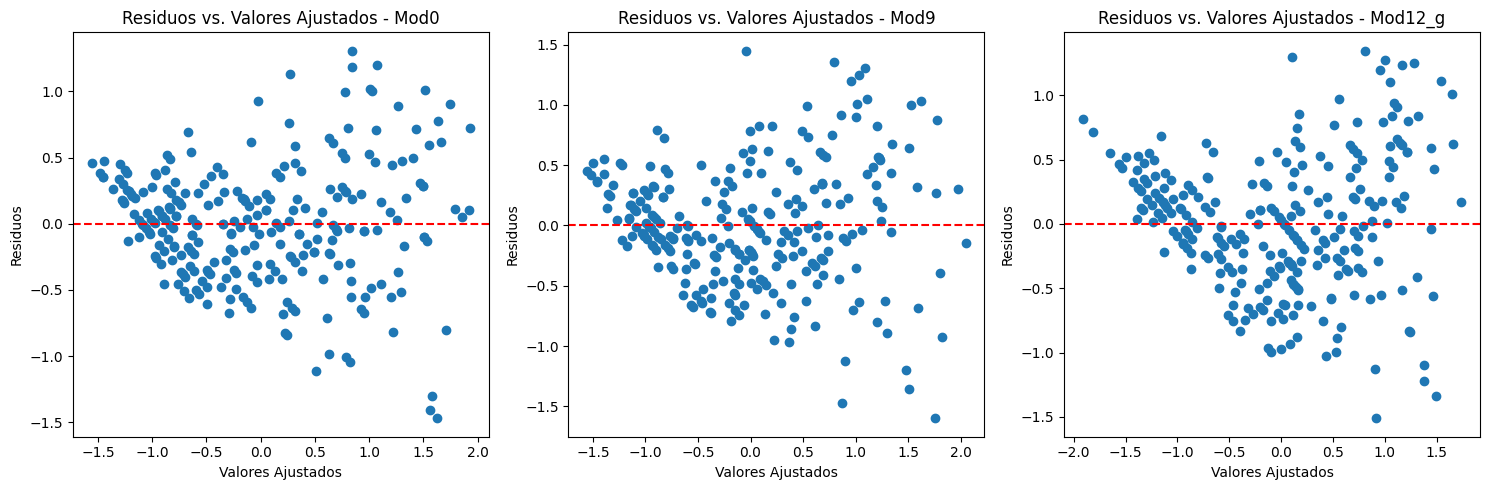

In [27]:
residuos1 = results1.resid
residuos2 = results2.resid
residuos3 = results3.resid

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Una fila de tres subplots

# Primer subplot
axs[0].scatter(results1.fittedvalues, residuos1)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Valores Ajustados')
axs[0].set_ylabel('Residuos')
axs[0].set_title('Residuos vs. Valores Ajustados')
axs[0].set_title('Residuos vs. Valores Ajustados - Mod0')

# Segundo subplot
axs[1].scatter(results2.fittedvalues, residuos2)
axs[1].axhline(y=0, color='r', linestyle='--')
axs[1].set_xlabel('Valores Ajustados')
axs[1].set_ylabel('Residuos')
axs[1].set_title('Residuos vs. Valores Ajustados')
axs[1].set_title('Residuos vs. Valores Ajustados - Mod9')

# Tercer subplot
axs[2].scatter(results3.fittedvalues, residuos3)
axs[2].axhline(y=0, color='r', linestyle='--')
axs[2].set_xlabel('Valores Ajustados')
axs[2].set_ylabel('Residuos')
axs[2].set_title('Residuos vs. Valores Ajustados')
axs[2].set_title('Residuos vs. Valores Ajustados - Mod12_g')


# Ajustar los subplots para evitar superposiciones
plt.tight_layout()

plt.show()


# Pregunta 5
Utilizando la data test realizar la predicción de la media (adicional: incluya los intervalos de confianza de las predicciones). 
Obtenga alguna medida de error de las predicciones.

In [28]:
# Pasar set de train (X e y) a un dataframe
df_xtest = pd.DataFrame(X_test)
df_ytest = pd.DataFrame(y_test)
df_test = pd.concat([df_ytest, df_xtest ], axis=1)
df_test.columns = vbles
df_test.head()

,O3,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,...,ibh2,dpg2,ibt2,doy2,temp3,humidity3,ibh3,dpg3,ibt3,doy3
0,-0.722048,-0.288825,-0.874504,-0.712397,-0.744939,-1.366835,-0.234688,0.154636,0.321378,-1.606479,...,-0.951086,-0.894066,-0.077272,-1.175617,-0.792232,-0.992324,-0.812759,-0.391360,-0.240870,-0.935111
1,1.778224,1.132330,-0.401412,-0.208234,1.471617,-1.100894,0.241996,1.748091,-0.057209,-0.042452,...,-0.918669,-0.537652,2.237906,-0.281826,1.666491,-0.578882,-0.808963,-0.275734,2.554016,-0.435089
2,0.028033,0.184894,-0.401412,1.153004,0.017002,0.117772,0.886922,0.167697,-0.309600,-0.272738,...,-0.203473,0.495652,-0.063202,-0.487486,-0.200547,1.560264,-0.410831,0.411098,-0.228555,-0.592301
3,-0.847062,-0.478312,-0.874504,-1.972803,-1.160543,1.347541,-1.973184,-1.242903,2.214312,-1.232264,...,1.461278,0.740050,-1.114229,-1.069124,-1.024737,-1.440342,1.513219,-1.418152,-0.907757,-0.908336
4,-0.597035,-1.615236,1.017865,1.001755,-1.091276,1.347541,1.055163,-1.634737,0.952356,-0.752501,...,1.461278,0.869438,-1.238308,-0.833805,-0.989961,1.234860,1.513219,0.745519,-0.940600,-0.807837


In [29]:
#predictores = ['temp', 'temp2','humidity','humidity2', 'ibh','ibh2', 'dpg','dpg2', 'ibt','ibt2', 'doy','doy2']
vbles = ['O3','temp', 'temp2','humidity','humidity2', 'ibh','ibh2', 'dpg','dpg2', 'ibt','ibt2', 'doy','doy2']


In [30]:
# Seleccionar las variables predictoras del modelo Mod12g

modelo_seleccionado = 'Mod12_g'
predictores = modelos[modelo_seleccionado]

X = df_test[predictores]
y = df_test['O3']
X = sm.add_constant(X)

# Predecir la media de O3 usando el modelo ajustado
y_pred = results3.predict(X)

In [31]:
# Calcular el coeficiente de determinación
print(r2_score(y_test, y_pred))

# Calcular el error cuadrático medio
print(mean_squared_error(y_test, y_pred))

0.7831977806981238
0.250243620717411


In [32]:
# Obtener un objeto con información sobre las predicciones
pred = results3.get_prediction(X)

# Obtener un dataframe con los intervalos de confianza al 95%
pred_ci = pred.summary_frame(alpha=0.05)
pred_ci

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.347038,0.133015,-0.608986,-0.085089,-1.422847,0.728771
1,1.372188,0.088120,1.198652,1.545724,0.314425,2.429951
2,0.482026,0.070431,0.343325,0.620727,-0.570583,1.534635
3,-1.270620,0.146132,-1.558399,-0.982840,-2.353008,-0.188231
4,-0.697175,0.086313,-0.867153,-0.527197,-1.754360,0.360010
...,...,...,...,...,...,...
61,1.355337,0.071061,1.215395,1.495278,0.302563,2.408110
62,0.869231,0.065596,0.740052,0.998411,-0.182165,1.920628
63,0.820000,0.085654,0.651320,0.988681,-0.236977,1.876978
64,-0.621380,0.085864,-0.790474,-0.452287,-1.678424,0.435663
